<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395 Redes Neuronales Artificiales 2019-1</h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

## Integrantes

* _**Francisco Olivares - 201473575-8 - francisco.olivars.14@sansano.usm.cl**_
* _**Gabriel Valenzuela - 201473505-7 - gabriel.valenzuel.14@sansano.usm.cl**_
* _**Felipe Vega - 201473511-1 - felipe.vega.14@sansano.usm.cl**_



<hr style="height:2px;border:none"/>

In [20]:
#Bloque de los imports
#Soy tu bloque pa' los imports papi
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 


#Sklearn stuff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Keras stuff
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

#Que se vea ancho el jupyter
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


#Cantidad de columnas a mostrar con pandas
pd.set_option('display.max_columns',100)

In [21]:
df_sets = pd.read_csv("data/koi_sets_unb.csv")

mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values

df_labels = pd.read_csv("data/koi_labels.csv")
df_X = pd.read_csv("data/koi_light_curves_X.csv")
df_labels_train = df_labels[mask_train]
df_labels_test = df_labels[mask_test]
df_X_train = df_X[mask_train]
df_X_test = df_X[mask_test]

In [22]:
y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values
df_X_train = df_X_train.reset_index(drop=True)
df_X_test = df_X_test.reset_index(drop=True)
df_X_train.fillna(df_X_train.median(), inplace=True)
df_X_test.fillna(df_X_test.median(), inplace=True)
X_train = df_X_train.values[:,1:]
X_test = df_X_test.values[:,1:]

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled =  scaler.transform(X_test)

/home/francisco/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/francisco/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/francisco/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/francisco/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
model = Sequential()
model.add(Dense(1280, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error')
###calculate gradients
from keras import backend as K
import keras
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)

listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

In [91]:
model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_val_scaled, y_val))
evaluated_gradients_50 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_50 = [gradient/len(y_train) for gradient in evaluated_gradients_50]

Gradientes pre-entrenamiento


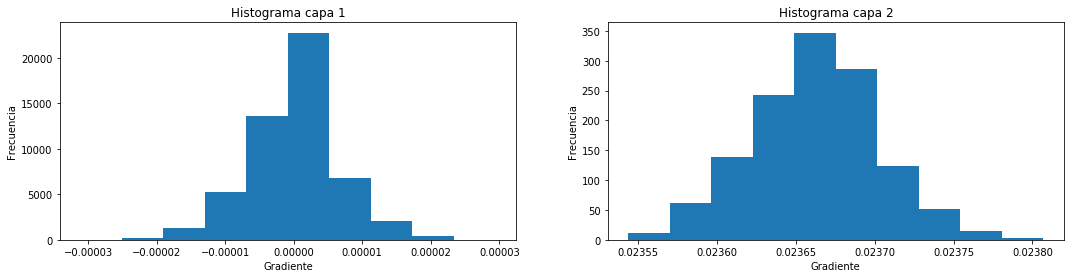

Gradientes post-entrenamiento


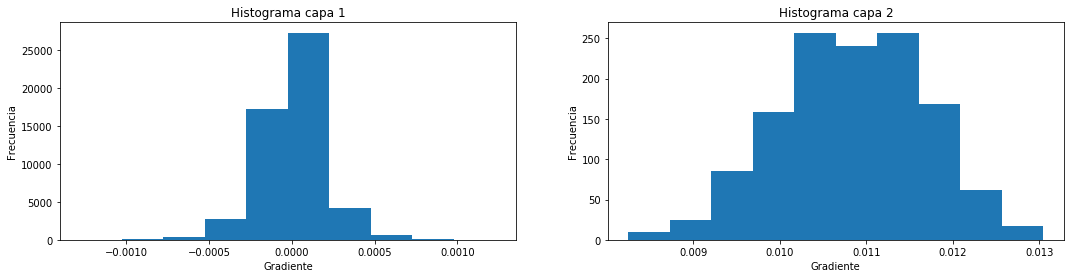

In [126]:
def show_hist_1(gradients):
    points_1 = list()
    for arr in gradients[0]:
        for i in arr:
            points_1.append(i)

    points_2 = list()
    for arr in gradients[2]:
        for i in arr:
            points_2.append(i)


    plt.figure(figsize=(18,4))

    plt.subplot(1, 2, 1)
    plt.hist(points_1)
    plt.title('Histograma capa 1')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    plt.hist(points_2)
    plt.title('Histograma capa 2')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')

    plt.show()
    #axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    # axes.set_ylim([0,30000])
    
    #plt.show()
    
print("Gradientes pre-entrenamiento")
show_hist_1(evaluated_gradients)
print("Gradientes post-entrenamiento")
show_hist_1(evaluated_gradients_50)

In [127]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error')

loss = keras.losses.mean_squared_error(model.output,y_train)

listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_val_scaled, y_val))
evaluated_gradients_50 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_50 = [gradient/len(y_train) for gradient in evaluated_gradients_50]



Gradientes pre-entrenamiento


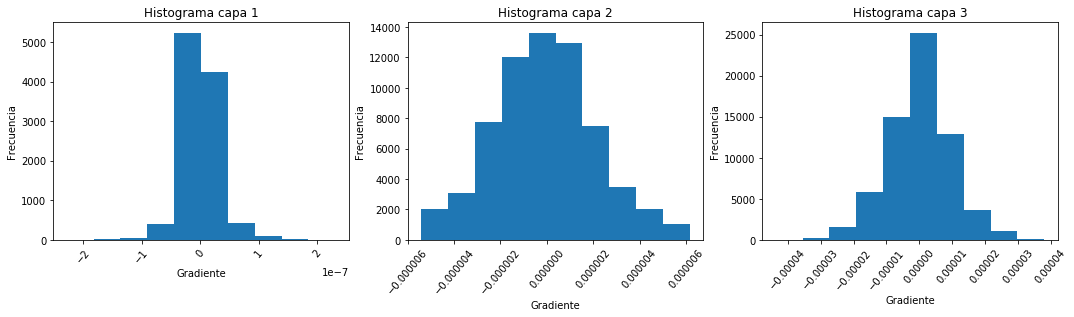

Gradientes post-entrenamiento


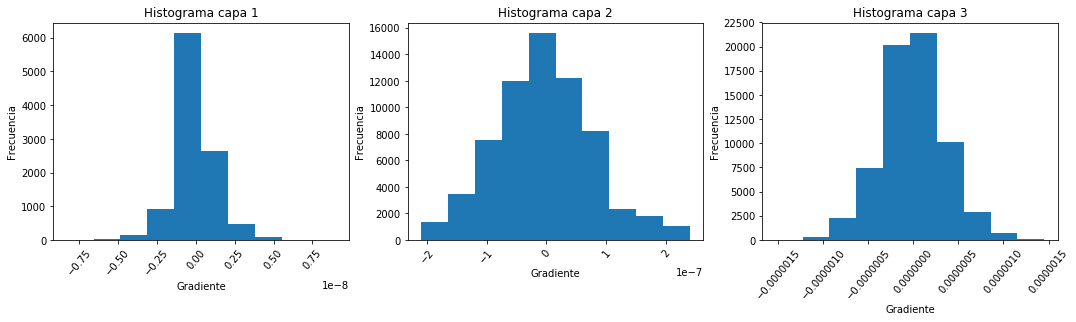

In [137]:
def show_hist_2(gradients):
    points_1 = list()
    for arr in gradients[0]:
        for i in arr:
            points_1.append(i)

    points_2 = list()
    for arr in gradients[2]:
        for i in arr:
            points_2.append(i)
            
    points_3 = list()
    for arr in gradients[4]:
        for i in arr:
            points_3.append(i)

    plt.figure(figsize=(18,4))

    plt.subplot(1, 3, 1)
    plt.hist(points_1)
    plt.title('Histograma capa 1')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=50)

    plt.subplot(1, 3, 2)
    plt.hist(points_2)
    plt.title('Histograma capa 2')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=50)
    
    plt.subplot(1, 3, 3)
    plt.hist(points_3)
    plt.title('Histograma capa 3')
    plt.xlabel('Gradiente')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=50)

    plt.show()
    
print("Gradientes pre-entrenamiento")
show_hist_2(evaluated_gradients)
print("Gradientes post-entrenamiento")
show_hist_2(evaluated_gradients_50)


<hr style="height:2px;border:none"/>